# 03_gradient_descent

# Q1：一変数の最急降下法について調べ、まとめよ。


# A1. 

**結論：**  
- 最急降下法とは、関数の傾きのみから、関数の最小値を探索する勾配法のアルゴリズムの一つ。  

**説明：**  
- 勾配法とは、関数の勾配を用いて最適な点を割り出す方法。  
- 最適な点とは、今回の内容では関数の最小値。  
- 最小値とはその関数がもつ最も小さい値。  
- 但し、最小値は見つけることができないため、極小値を見つける。  
- 極小値とは、局所的に定まる値。  
- 勾配法では、説明変数に与える値を反復させながら説明変数を極小値へ近づけていく。  
- k回目の反復で極小値がx^(k)の位置にある。  

引用：https://ja.wikipedia.org/wiki/%E6%9C%80%E6%80%A5%E9%99%8D%E4%B8%8B%E6%B3%95

<img src="images/gradient_descent.png" heigth="50%" width="50%" align="left">

$
x^(k+1) = x^(k) - α\frac{d f(x^(k))}{d x}
$

勾配法の式  

<img src="images/delta.png" heigth="50%" width="50%" align="left">

## 最急勾配法を値を入れて確認してみる。  

上記式に値を入れて更新値を確認してみる。  
スタート地点**x0の値を-3**とする。
調整項**αの値を0.1**とする。  

<img src="images/steepest_descent_method.png" heigth="50%" width="50%" align="left">

### ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

# Q2：y = 1.5x^{2} + e (e は平均0、標準偏差 0.1 の正規分布に従う確率変数) <br><br>を用いてデータを生成せよ。

# A.

**正解データを算出する式は以下**  
**下のグラフは誤差を考慮してデータを作る様子(データ点は見本)**  

<img src="images/e.png" heigth="50%" width="50%" align="left">

<img src="images/variance.png" heigth="50%" width="50%" align="left">

In [1]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-1,1, num=10)  # -1から1までの等差数列を20個作る
error = np.random.normal(0, 0.1, 10)  # 平均0, 標準偏差0.1 の正規分布に則ったランダム値を20個作る

y =1.5*(x_data**2)+error # y = 1.5*x^2 + eの関数
correct_data = pd.DataFrame({"y": y, "x": x_data})
correct_data  # データを作成

,y,x
0,1.403865,-1.000000
1,0.890413,-0.777778
2,0.325143,-0.555556
3,0.318510,-0.333333
4,-0.143782,-0.111111
5,0.026797,0.111111
6,0.262367,0.333333
7,0.498405,0.555556
8,1.028913,0.777778
9,1.413751,1.000000


# 【結果グラフ】生成したデータをグラフに描画

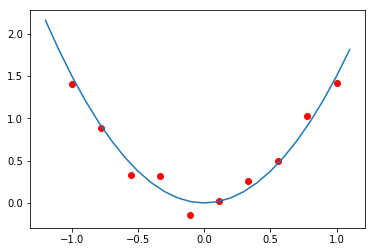

In [2]:
x = np.arange(-1.2, 1.2, 0.1)
y = 1.5*x**2
plt.plot(x,y)
plt.scatter(correct_data["x"], correct_data["y"], color="red")

# plt.ylim(-2,2)
plt.show()

### ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

# Q3：<br>2で生成したデータに対して、最急降下法を用いて<br>二乗誤差を最小化するように y = ax^{2} のパラメータ a を<br>決定するプログラムを書き、実行せよ。<br><br>また、その際に用いた式を書け。<br>「横軸をイテレーション、縦軸を誤差としたグラフ」と、<br>「横軸を $x$ 縦軸を $y$ として、データを点で、<br>パラメータ調整後の関数の出力を曲線で描画したグラフ」を描け。

# A.3

In [3]:
# Q2で求めたデータの確認
correct_data

,y,x
0,1.403865,-1.000000
1,0.890413,-0.777778
2,0.325143,-0.555556
3,0.318510,-0.333333
4,-0.143782,-0.111111
5,0.026797,0.111111
6,0.262367,0.333333
7,0.498405,0.555556
8,1.028913,0.777778
9,1.413751,1.000000


<img src="images/distance.png" heigth="50%" width="50%" align="left">

## 上記式よりパラメータの更新。
## 初期パラメータa = 0.1が正解パラメータ1.5に近くのか検証

In [32]:
y = correct_data["y"]  # データy(正解値)
x = correct_data["x"]  # データx(入力値)
α = 0.005  # ハイパーパラメータ(調整項)
a = 0.1 # 初期値のパラメータa
error_list = []  # 誤差保管用リスト
update_parameter_list = []  #更新パラメータ保管用リスト


error = sum((a*x**2)-y)**2
print("初期誤差：", error)
print("初期パラメータ：", a)

for _ in range(1000):
    # 誤差関数
    error = sum((a*x**2)-y)**2
    error_list.append(error)  
    # 最急降下法
    a = a - α*(sum(((a*x**2)-y)*x**2))  # パラメータ更新
    update_parameter_list.append(a)

print("\n")
print("1000回パラメータ更新後の誤差：", error)
print("1000回更新時パラメータ：", a)
print("正解データのパラメータは 1.5です")

初期誤差： 31.55039728365473
初期パラメータ： 0.1


1000回パラメータ更新後の誤差： 0.00744254212823944
1000回更新時パラメータ： 1.4575364100421426
正解データのパラメータは 1.5です


### 【結論】上記結果よりパラメータ更新で得られた値は正解データのパラメータに近づいた。

## 【グラフ1】横軸を(parameter)イテレーション、縦軸を誤差としたグラフ

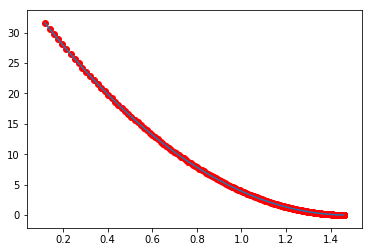

In [33]:
plt.plot(update_parameter_list, error_list)  # 更新結果パラメータリスト、更新結果誤差リスト
plt.scatter(update_parameter_list, error_list, color="red")

plt.show()

# 以下のグラフより、パラメータwが更新される度に誤差が小さくなっている様子が分かる

## 【グラフ2】<br><br>横軸を  𝑥  縦軸を  𝑦  として、データを点で、<br><br>パラメータ調整後の関数の出力を曲線で描画したグラフ

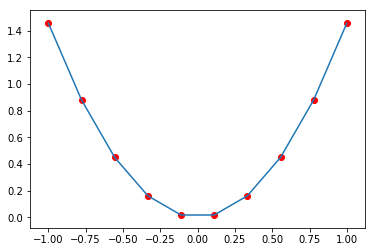

In [34]:
y = update_parameter_list[-1]*x**2  # 予測値yを求める(更新パラメータリストの最後を利用)
plt.plot(x,y)
plt.scatter(x, y, color="red")

plt.show()